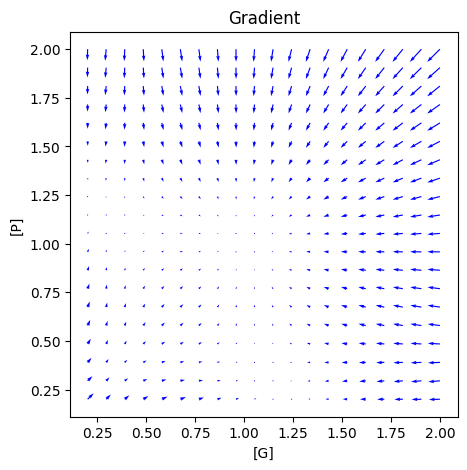

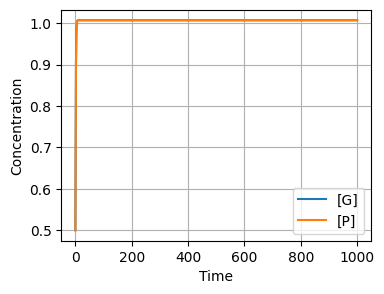

In [87]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def derivative(G, P, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

def model(y, t, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2):
    G, P = y
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return dG_dt, dP_dt

# Parameters
n=4
m=1

a1=1
a2=1

b1=1
b2=1

theta_a1=0.5
theta_a2=0.5

theta_b1=0.07
theta_b2=0.07

k1=1
k2=1

P0=0.5
G0=0.5

G=np.linspace(0.2, 2, 20)
P=np.linspace(0.2, 2, 20)
GG, PP = np.meshgrid(G, P)

dG_dt,dP_dt=derivative(GG, PP, n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2)

#dist=(np.abs(dG_dt)**2+np.abs(dP_dt)**2)**0.5
#dG_dt=dG_dt/dist
#dP_dt=dP_dt/dist

plt.figure(figsize=(5,5))
plt.quiver(GG, PP, dG_dt, dP_dt, scale=30, scale_units=None, angles='xy', color='blue', width=0.003)
#plt.plot([np.min(G),np.max(G)],[np.min(P),np.max(P)],'r-')
plt.xlabel('[G]')
plt.ylabel('[P]')
plt.title('Gradient')

# Time array
t = np.linspace(0, 1000, 10000)

# Sample initial conditions on a log scale
#initial_conditions = np.logspace(-3, 0.18, 5)  # Adjust the range as needed

# Create a list to store simulation results
#population_trajectories = []

# Perform multiple simulations with different initial conditions
#for N0 in initial_conditions:
    #N = odeint(logistic_growth_with_dilution, N0, t, args=(mu, Nm, D))
    #population_trajectories.append(N)

result = odeint(model, [G0, P0], t, args=(n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2))
# Plot results
plt.figure(figsize=(4, 3))
#for i, N in enumerate(population_trajectories):
#    plt.semilogy(t, N, label=f'Initial N0 = {initial_conditions[i]:.3f}')
plt.plot(t,result[:,0],label='[G]')
plt.plot(t,result[:,1],label='[P]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
#plt.title('')
plt.grid(True)
plt.show()


In [9]:
from scipy.optimize import root
import numpy as np
from scipy.optimize import minimize

global n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2

def derivative(G,P):
    f1 = a1*G**n/(theta_a1**n+G**n)
    f2 = a2*P**n/(theta_a2**n+P**n)
    d1 = b1*theta_b1**m/(theta_b1**m+(G*P)**m)
    d2 = b2*theta_b2**m/(theta_b2**m+(G*P)**m)
    dG_dt = f1+d1-k1*G
    dP_dt = f2+d2-k2*P
    return (dG_dt**2 + dP_dt**2)**0.5

def find_zero(G, P,parameters):
    n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2 = parameters
    GG, PP = np.meshgrid(G, P)
    GG=GG.reshape(np.size(GG))
    PP=PP.reshape(np.size(PP))
    return minimize(derivative,GG,PP)

G=np.linspace(0.2, 2, 20)
P=np.linspace(0.2, 2, 20)

n_p=np.linspace(0.2, 2, 20)
m_p=np.linspace(0.2, 2, 20)
a1_p=np.linspace(0.2, 2, 20)
b1_p=np.linspace(0.2, 2, 20)
a2_p=np.linspace(0.2, 2, 20)
b2_p=np.linspace(0.2, 2, 20)
theta_a1_p=np.linspace(0.2, 2, 20)
theta_b1_p=np.linspace(0.2, 2, 20)
k1_p=np.linspace(0.2, 2, 20)
theta_a2_p=np.linspace(0.2, 2, 20)
theta_b2_p=np.linspace(0.2, 2, 20)
k2_p=np.linspace(0.2, 2, 20)

sol=[]

for n_in in n_p:
    for m_in in m_p:
        for a1_in in a1_p:
            for b1_in in b1_p:
                for a2_in in a2_p:
                    for b2_in in b2_p:
                        for theta_a1_in in theta_a1_p:
                            for theta_b1_in in theta_b1_p:
                                for k1_in in k1_p:
                                    for theta_a2_in in theta_a2_p:
                                        for theta_b2_in in theta_b2_p:
                                            for k2_in in k2_p:
                                                sol.append(find_zero(G,P,(n_in,m_in,a1_in,b1_in,a2_in,b2_in,theta_a1_in,theta_b1_in,k1_in,theta_a2_in,theta_b2_in,k2_in)))

print(sol)

C:\Users\HP\AppData\Local\Temp\ipykernel_16420\1144864302.py:21: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  return minimize(derivative,[GG,PP])


TypeError: derivative() missing 1 required positional argument: 'P'

In [1]:
from sympy import *
import numpy as np

global n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2
n=4
m=1

a1=1
a2=1

b1=1
b2=1

theta_a1=0.5
theta_a2=0.5

theta_b1=0.07
theta_b2=0.07

k1=1
k2=1

G_var,P_var = symbols('G_var,P_var')

f1 = a1*G_var**n/(theta_a1**n+G_var**n)
f2 = a2*P_var**n/(theta_a2**n+P_var**n)
d1 = b1*theta_b1**m/(theta_b1**m+(G_var*P_var)**m)
d2 = b2*theta_b2**m/(theta_b2**m+(G_var*P_var)**m)
dG_dt = f1+d1-k1*G_var
dP_dt = f2+d2-k2*P_var
#f = (dG_dt**2 + dP_dt**2)**0.5
#f = dG_dt + dP_dt
f = dG_dt * dP_dt
#f=G_var*G_var+(P_var-1)*(P_var-1)

def get_grad(f, X):

    f1 = diff(f, G_var)
    f2 = diff(f, P_var)

    grad = np.array([f1.subs([(G_var, X[0]), (P_var, X[1])]),
                     f2.subs([(G_var, X[0]), (P_var, X[1])])])
    return grad

def get_hess(f, X):

    f1 = diff(f, G_var)
    f2 = diff(f, P_var)
    f11 = diff(f,G_var,2)
    f22 = diff(f,P_var,2)
    f12 = diff(f1,P_var)
    f21 = diff(f2,G_var)
    hess = np.array([[f11.subs([(G_var,X[0]), (P_var,X[1])]), f12.subs([(G_var,X[0]), (P_var,X[1])])],
                     [f21.subs([(G_var,X[0]), (P_var,X[1])]), f22.subs([(G_var,X[0]), (P_var,X[1])])]])

    hess = np.array(hess, dtype = 'float')
    return hess

def newton_iter(X0, err, Max_iter):
    
    count = 0
    X1 = np.array([0,0])
    while count<=Max_iter:

        X2 = X0 - X1
        if sqrt(X2[0]**2 + X2[1]**2) <= err:
            break
        else:
            hess = get_hess(f, X0)
            
            hess_inv = np.linalg.inv(hess)
            grad = get_grad(f, X0)
            X1 = X0 
            
            X0 = X1 - np.dot(hess_inv, grad)
            count += 1
            print('# of iterations:',count,'Current result:','G=',X0[0],'P=',X0[1])
    print('# of iterations:',count)
    print('Result:',X0)
    print('Function value:',f.subs([(G_var, X0[0]), (P_var, X0[1])]))
    print("Gradient:",grad)
    print("Hessian matrix determinant:",hess[0][0]*hess[1][1]-hess[0][1]*hess[1][0])
    #return X0[0],X0[1],f.subs([(G_var, X0[0]), (P_var, X0[1])]),hess[0][0]*hess[1][1]-hess[0][1]*hess[1][0]


X0 = np.array([0.2,1.5])
err = 1e-8
Max_iter=100
newton_iter(X0, err, Max_iter)




# of iterations: 1 Current result: G= 0.222368429700007 P= 1.23754488232529
# of iterations: 2 Current result: G= 0.244185327871568 P= 1.17882415605675
# of iterations: 3 Current result: G= 0.253223280064784 P= 1.16101992973652
# of iterations: 4 Current result: G= 0.254923533413764 P= 1.15813984229715
# of iterations: 5 Current result: G= 0.254981039959485 P= 1.15804928806699
# of iterations: 6 Current result: G= 0.254981102166950 P= 1.15804919447379
# of iterations: 7 Current result: G= 0.254981102167020 P= 1.15804919447368
# of iterations: 7
Result: [0.254981102167020 1.15804919447368]
Function value: 3.08148791101958e-33
Gradient: [2.11012892514654e-14 -2.62826245999306e-14]
Hessian matrix determinant: -0.3722411962371706


(0.254981102167020,
 1.15804919447368,
 3.08148791101958e-33,
 -0.3722411962371706)

In [4]:
global n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2

from sympy import *
import numpy as np

G_var,P_var = symbols('G_var,P_var')

f1 = a1*G_var**n/(theta_a1**n+G_var**n)
f2 = a2*P_var**n/(theta_a2**n+P_var**n)
d1 = b1*theta_b1**m/(theta_b1**m+(G_var*P_var)**m)
d2 = b2*theta_b2**m/(theta_b2**m+(G_var*P_var)**m)
dG_dt = f1+d1-k1*G_var
dP_dt = f2+d2-k2*P_var
#f = (dG_dt**2 + dP_dt**2)**0.5
#f = dG_dt + dP_dt
f = dG_dt * dP_dt
#f=G_var*G_var+(P_var-1)*(P_var-1)

def get_grad(f, X):

    f1 = diff(f, G_var)
    f2 = diff(f, P_var)

    grad = np.array([f1.subs([(G_var, X[0]), (P_var, X[1])]),
                     f2.subs([(G_var, X[0]), (P_var, X[1])])])
    return grad

def get_hess(f, X):

    f1 = diff(f, G_var)
    f2 = diff(f, P_var)
    f11 = diff(f,G_var,2)
    f22 = diff(f,P_var,2)
    f12 = diff(f1,P_var)
    f21 = diff(f2,G_var)
    hess = np.array([[f11.subs([(G_var,X[0]), (P_var,X[1])]), f12.subs([(G_var,X[0]), (P_var,X[1])])],
                     [f21.subs([(G_var,X[0]), (P_var,X[1])]), f22.subs([(G_var,X[0]), (P_var,X[1])])]])

    hess = np.array(hess, dtype = 'float')
    return hess

def newton_iter(X0, err, Max_iter):
    
    count = 0
    X1 = np.array([0,0])
    while count<=Max_iter:

        X2 = X0 - X1
        if sqrt(X2[0]**2 + X2[1]**2) <= err:
            break
        else:
            hess = get_hess(f, X0)
            
            hess_inv = np.linalg.inv(hess)
            grad = get_grad(f, X0)
            X1 = X0 
            
            X0 = X1 - np.dot(hess_inv, grad)
            count += 1
            print('# of iterations:',count,'Current result:','G=',X0[0],'P=',X0[1])
    print('# of iterations:',count)
    print('Result:',X0)
    print('Function value:',f.subs([(G_var, X0[0]), (P_var, X0[1])]))
    print("Gradient:",grad)
    print("Hessian matrix determinant:",hess[0][0]*hess[1][1]-hess[0][1]*hess[1][0])
    return X0[0],X0[1],f.subs([(G_var, X0[0]), (P_var, X0[1])]),hess[0][0]*hess[1][1]-hess[0][1]*hess[1][0]
    
def find_minimum(G,P,err,Max_iter):
    GG=G.reshape(G.size)
    PP=P.reshape(P.size)
    sol=[]
    for g in GG:
        for p in PP:
            a,b,c,d=newton_iter([g,p],err,Max_iter)
            i=0
            while i<len(sol):
                if np.abs(sol[i][0]-a)>1e-5 and np.abs(sol[i][1]-b)>1e-5:
                    sol.append([a,b,c,d,n,m,a1,b1,a2,b2,theta_a1,theta_b1,k1,theta_a2,theta_b2,k2])
                i+=1
            
    return np.array(sol)


G=np.linspace(0.2, 2, 20)
P=np.linspace(0.2, 2, 20)

GG, PP = np.meshgrid(G, P)

n_p=np.linspace(0.2, 2, 20)
m_p=np.linspace(0.2, 2, 20)
a1_p=np.linspace(0.2, 2, 20)
b1_p=np.linspace(0.2, 2, 20)
a2_p=np.linspace(0.2, 2, 20)
b2_p=np.linspace(0.2, 2, 20)
theta_a1_p=np.linspace(0.2, 2, 20)
theta_b1_p=np.linspace(0.2, 2, 20)
k1_p=np.linspace(0.2, 2, 20)
theta_a2_p=np.linspace(0.2, 2, 20)
theta_b2_p=np.linspace(0.2, 2, 20)
k2_p=np.linspace(0.2, 2, 20)


err=1e-10
Max_iter=150

sol=[]

for n_in in n_p:
    for m_in in m_p:
        for a1_in in a1_p:
            for b1_in in b1_p:
                for a2_in in a2_p:
                    for b2_in in b2_p:
                        for theta_a1_in in theta_a1_p:
                            for theta_b1_in in theta_b1_p:
                                for k1_in in k1_p:
                                    for theta_a2_in in theta_a2_p:
                                        for theta_b2_in in theta_b2_p:
                                            for k2_in in k2_p:
                                                n, m, a1, b1, a2, b2, theta_a1, theta_b1, k1, theta_a2, theta_b2, k2=n_in, m_in, a1_in, b1_in, a2_in, b2_in, theta_a1_in, theta_b1_in, k1_in, theta_a2_in, theta_b2_in, k2_in
                                                sol.append(find_minimum(GG,PP,err,Max_iter))


# of iterations: 1 Current result: G= 0.646530362352841 P= 0.646530362352842
# of iterations: 2 Current result: G= 0.981184419029345 P= 0.981184419029345
# of iterations: 3 Current result: G= 0.999972114466409 P= 0.999972114466409
# of iterations: 4 Current result: G= 0.999999999940614 P= 0.999999999940614
# of iterations: 5 Current result: G= 1.00000000000000 P= 1.00000000000000
# of iterations: 5
Result: [1.00000000000000 1.00000000000000]
Function value: 0
Gradient: [-2.61257566160940e-12 -2.61257566160940e-12]
Hessian matrix determinant: -0.0015924112264243835
# of iterations: 1 Current result: G= 0.646530362352841 P= 0.646530362352842
# of iterations: 2 Current result: G= 0.981184419029345 P= 0.981184419029345
# of iterations: 3 Current result: G= 0.999972114466409 P= 0.999972114466409
# of iterations: 4 Current result: G= 0.999999999940614 P= 0.999999999940614
# of iterations: 5 Current result: G= 1.00000000000000 P= 1.00000000000000
# of iterations: 5
Result: [1.00000000000000 1

KeyboardInterrupt: 